### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 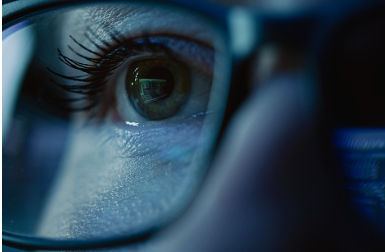 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
tf.debugging.set_log_device_placement(False)

### Import data into tensorflow dataset object

In [96]:
BATCH_SIZE = 12 
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

#### BATCH_SIZE: The number of samples (images in this case) that the model processes at once during one iteration of training
#### EPOCHS: The number of times the entire dataset is passed forward and backward through the neural network. One epoch consists of one full cycle through the training data. Training for more epochs can allow the model to learn more from the data 

In [32]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "glasses",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 86 files belonging to 2 classes.


In [33]:
class_names = dataset.class_names
class_names

['glasses', 'no_glasses']

In [34]:
len(dataset)

8

In [35]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(12, 256, 256, 3)
[0 0 0 0 0 0 0 1 0 0 1 0]


### Visualize some of the images from our dataset

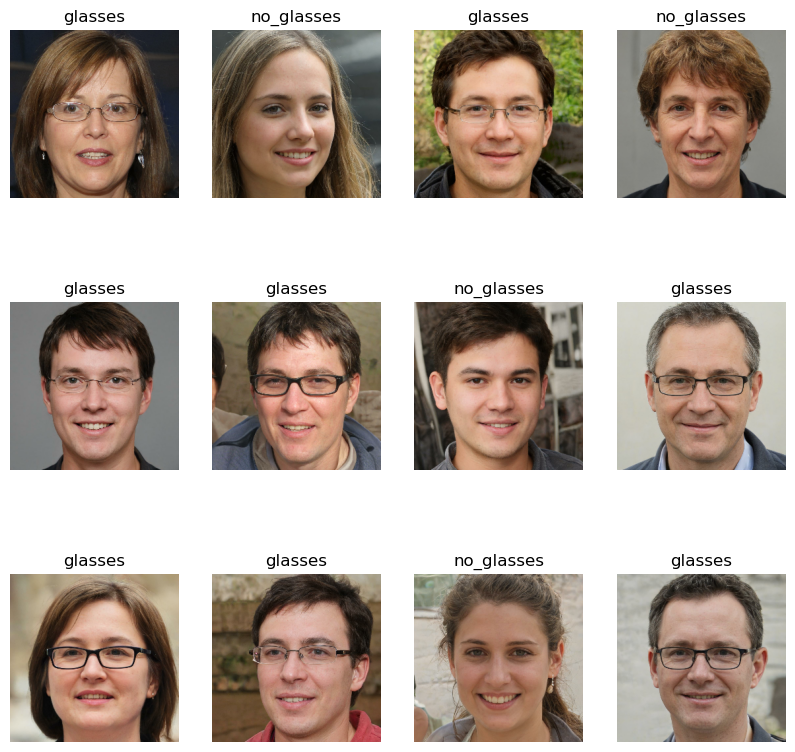

In [36]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Function to Split Dataset

In [37]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [38]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [39]:
print('length of traning data set:',len(train_ds))
print('length of validation data set:',len(val_ds))
print('length of testing data set:',len(test_ds))


length of traning data set: 5
length of validation data set: 1
length of testing data set: 2


### Cache, Shuffle, and Prefetch the Dataset

In [40]:
train_ds = train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

### Building the Model

In [41]:
resize_and_rescale = Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

#### Data Augumentation

In [42]:
### Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
    layers.experimental.preprocessing.RandomContrast(0.2)
])

In [87]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])


model.build(input_shape=input_shape)

In [88]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (12, 254, 254, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPooli  (12, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (12, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (12, 62, 62, 64)          0         
 ng2D)                                               

In [89]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [90]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50


2024-01-08 19:24:02.930001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:02.930009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:02.940645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


1/5 [=====>........................] - ETA: 3s - loss: 1.1622 - accuracy: 0.0000e+00

2024-01-08 19:24:03.296056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.296121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.296354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


4/5 [=======================>......] - ETA: 0s - loss: 0.8841 - accuracy: 0.6579

2024-01-08 19:24:03.649403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.649466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.650099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.740748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.740750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:03.741772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 2s 182ms/step - loss: 0.8846 - accuracy: 0.6400 - val_loss: 1.0088 - val_accuracy: 0.5000
Epoch 2/50
3/5 [=================>............] - ETA: 0s - loss: 0.7517 - accuracy: 0.7308

2024-01-08 19:24:04.026794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.026861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.026898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.085722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.085724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.086071: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 72ms/step - loss: 0.7493 - accuracy: 0.7000 - val_loss: 0.8253 - val_accuracy: 0.5000
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7061 - accuracy: 0.5833

2024-01-08 19:24:04.282973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.282979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.283879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.376424: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.376444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.377094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 64ms/step - loss: 0.6538 - accuracy: 0.7000 - val_loss: 0.7471 - val_accuracy: 0.5000
Epoch 4/50


2024-01-08 19:24:04.497896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.497899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.499388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.540582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.540622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.540704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

3/5 [=================>............] - ETA: 0s - loss: 0.6597 - accuracy: 0.6923

2024-01-08 19:24:04.701269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.758988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.759286: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.762744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.800030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.800120: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 62ms/step - loss: 0.6252 - accuracy: 0.7000 - val_loss: 0.8245 - val_accuracy: 0.5000
Epoch 5/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4792 - accuracy: 0.8333

2024-01-08 19:24:04.925882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.925929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:04.926695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.010073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.010078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.010810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 61ms/step - loss: 0.6750 - accuracy: 0.7000 - val_loss: 0.9708 - val_accuracy: 0.5000
Epoch 6/50


2024-01-08 19:24:05.131337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.131334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.134579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.175248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.175294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.176140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

4/5 [=======================>......] - ETA: 0s - loss: 0.6662 - accuracy: 0.6842

2024-01-08 19:24:05.359550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.359570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.359897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.418622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.418629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.419573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 63ms/step - loss: 0.6418 - accuracy: 0.7000 - val_loss: 0.7710 - val_accuracy: 0.5000
Epoch 7/50
3/5 [=================>............] - ETA: 0s - loss: 0.5943 - accuracy: 0.7222

2024-01-08 19:24:05.613005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.613015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.613055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.670887: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.671057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.671448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.6130 - accuracy: 0.7000 - val_loss: 0.7506 - val_accuracy: 0.5000
Epoch 8/50
2/5 [===========>..................] - ETA: 0s - loss: 0.6943 - accuracy: 0.5833

2024-01-08 19:24:05.841414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.841474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.841692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.910122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.910157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:05.910480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.6047 - accuracy: 0.7000 - val_loss: 0.8713 - val_accuracy: 0.5000
Epoch 9/50
1/5 [=====>........................] - ETA: 0s - loss: 0.2431 - accuracy: 1.0000

2024-01-08 19:24:06.080937: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.080963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.081304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.135050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.135055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.135110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 63ms/step - loss: 0.6994 - accuracy: 0.7000 - val_loss: 0.8912 - val_accuracy: 0.5000
Epoch 10/50


2024-01-08 19:24:06.297610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.297811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.298587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.356203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.356276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.356334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

4/5 [=======================>......] - ETA: 0s - loss: 0.5759 - accuracy: 0.7368

2024-01-08 19:24:06.544755: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.544772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.544997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.601877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.602024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.602777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 61ms/step - loss: 0.6131 - accuracy: 0.7000 - val_loss: 0.7939 - val_accuracy: 0.5000
Epoch 11/50
3/5 [=================>............] - ETA: 0s - loss: 0.5754 - accuracy: 0.7222

2024-01-08 19:24:06.789834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.789922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.790574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.846461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.846505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:06.846836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5986 - accuracy: 0.7000 - val_loss: 0.7662 - val_accuracy: 0.5000
Epoch 12/50
3/5 [=================>............] - ETA: 0s - loss: 0.6051 - accuracy: 0.7222

2024-01-08 19:24:07.068039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.068044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.068590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.122288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.122299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.122538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 58ms/step - loss: 0.6165 - accuracy: 0.7000 - val_loss: 0.8091 - val_accuracy: 0.5000
Epoch 13/50
2/5 [===========>..................] - ETA: 0s - loss: 0.7199 - accuracy: 0.6429

2024-01-08 19:24:07.286876: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.286916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.287002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.356199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.356199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.356826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 61ms/step - loss: 0.6440 - accuracy: 0.7000 - val_loss: 0.9084 - val_accuracy: 0.5000
Epoch 14/50
1/5 [=====>........................] - ETA: 0s - loss: 0.2104 - accuracy: 1.0000

2024-01-08 19:24:07.501821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.501854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.502087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.555614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.555627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.556461: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 61ms/step - loss: 0.6325 - accuracy: 0.7000 - val_loss: 0.8167 - val_accuracy: 0.5000
Epoch 15/50


2024-01-08 19:24:07.722601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.722652: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.722761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.779872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.780263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.780441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - ETA: 0s - loss: 0.6088 - accuracy: 0.7000

2024-01-08 19:24:07.963811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.963818: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:07.964220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.019089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.019092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.019341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.6088 - accuracy: 0.7000 - val_loss: 0.7591 - val_accuracy: 0.5000
Epoch 16/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5703 - accuracy: 0.7368

2024-01-08 19:24:08.184697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.184834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.185204: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.216183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.216300: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.216648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.6158 - accuracy: 0.7000 - val_loss: 0.8300 - val_accuracy: 0.5000
Epoch 17/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5634 - accuracy: 0.7368

2024-01-08 19:24:08.452675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.452712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.453017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.484328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.484427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.484762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 58ms/step - loss: 0.6115 - accuracy: 0.7000 - val_loss: 0.8447 - val_accuracy: 0.5000
Epoch 18/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5690 - accuracy: 0.7368

2024-01-08 19:24:08.719792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.719856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.719926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.774177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.774199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.774473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.6086 - accuracy: 0.7000 - val_loss: 0.8018 - val_accuracy: 0.5000
Epoch 19/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5698 - accuracy: 0.7368

2024-01-08 19:24:08.988640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.988641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:08.988967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.020295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.020412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.020643: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.6057 - accuracy: 0.7000 - val_loss: 0.8108 - val_accuracy: 0.5000
Epoch 20/50
4/5 [=======================>......] - ETA: 0s - loss: 0.6316 - accuracy: 0.6842

2024-01-08 19:24:09.260478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.260489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.260776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.313963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.313998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.314532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.6118 - accuracy: 0.7000 - val_loss: 0.7950 - val_accuracy: 0.5000
Epoch 21/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5665 - accuracy: 0.7368

2024-01-08 19:24:09.536062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.536062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.536611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.566129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.566133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.566186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.6095 - accuracy: 0.7000 - val_loss: 0.8016 - val_accuracy: 0.5000
Epoch 22/50
3/5 [=================>............] - ETA: 0s - loss: 0.6288 - accuracy: 0.6667

2024-01-08 19:24:09.804106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.804108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.804328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.858265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.858401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:09.858824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.6075 - accuracy: 0.7000 - val_loss: 0.7198 - val_accuracy: 0.5000
Epoch 23/50
3/5 [=================>............] - ETA: 0s - loss: 0.6176 - accuracy: 0.6923

2024-01-08 19:24:10.020334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.020402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.020564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.070870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.070931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.071525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 60ms/step - loss: 0.6038 - accuracy: 0.7000 - val_loss: 0.8075 - val_accuracy: 0.5000
Epoch 24/50
2/5 [===========>..................] - ETA: 0s - loss: 0.7100 - accuracy: 0.5833

2024-01-08 19:24:10.266727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.266738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.266743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.344037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.344037: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.344335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 56ms/step - loss: 0.5885 - accuracy: 0.7000 - val_loss: 1.0341 - val_accuracy: 0.5000
Epoch 25/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7849 - accuracy: 0.5833

2024-01-08 19:24:10.506051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.506189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.506905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.562137: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.562156: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.562821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.6266 - accuracy: 0.7000 - val_loss: 0.8786 - val_accuracy: 0.5000
Epoch 26/50


2024-01-08 19:24:10.738526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.738546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.738968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.792428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.792449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.792607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.7000

2024-01-08 19:24:10.950760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.950830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.951293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.982104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.982184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:10.982305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.6379 - accuracy: 0.7000 - val_loss: 0.7863 - val_accuracy: 0.5000
Epoch 27/50
4/5 [=======================>......] - ETA: 0s - loss: 0.6126 - accuracy: 0.6579

2024-01-08 19:24:11.169111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.169122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.169778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.201931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.201990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.201994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 58ms/step - loss: 0.5731 - accuracy: 0.7000 - val_loss: 0.7433 - val_accuracy: 0.5000
Epoch 28/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5649 - accuracy: 0.7368

2024-01-08 19:24:11.435049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.435050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.435363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.490650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.490667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.490785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.6048 - accuracy: 0.7000 - val_loss: 0.9448 - val_accuracy: 0.5000
Epoch 29/50
3/5 [=================>............] - ETA: 0s - loss: 0.6375 - accuracy: 0.6389

2024-01-08 19:24:11.704569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.704572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.704596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.758981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.758985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.759279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.5898 - accuracy: 0.7000 - val_loss: 0.7278 - val_accuracy: 0.5000
Epoch 30/50
2/5 [===========>..................] - ETA: 0s - loss: 0.5962 - accuracy: 0.6667

2024-01-08 19:24:11.925296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.925313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.926023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.975914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.975976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:11.976216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.5705 - accuracy: 0.7000 - val_loss: 1.0341 - val_accuracy: 0.5000
Epoch 31/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.5833

2024-01-08 19:24:12.144516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.144543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.144901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.197901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.198008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.198557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5621 - accuracy: 0.7000 - val_loss: 1.1182 - val_accuracy: 0.5000
Epoch 32/50
1/5 [=====>........................] - ETA: 0s - loss: 0.1126 - accuracy: 1.0000

2024-01-08 19:24:12.358396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.358575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.358942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.393138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.393139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.393346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 59ms/step - loss: 0.5478 - accuracy: 0.7000 - val_loss: 0.7811 - val_accuracy: 0.5000
Epoch 33/50


2024-01-08 19:24:12.608360: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.608536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.608724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.660739: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.660738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.661073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - ETA: 0s - loss: 0.5462 - accuracy: 0.7000

2024-01-08 19:24:12.848173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.848323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.848403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.876323: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.876420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:12.876793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.5462 - accuracy: 0.7000 - val_loss: 0.9689 - val_accuracy: 0.5000
Epoch 34/50
3/5 [=================>............] - ETA: 0s - loss: 0.5324 - accuracy: 0.7222

2024-01-08 19:24:13.061657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.061664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.061923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.114593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.114596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.114828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 52ms/step - loss: 0.5639 - accuracy: 0.7000 - val_loss: 1.2332 - val_accuracy: 0.5000
Epoch 35/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5761 - accuracy: 0.6842

2024-01-08 19:24:13.327149: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.327158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.327595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.380169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.380285: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.380578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5552 - accuracy: 0.7000 - val_loss: 0.8237 - val_accuracy: 0.5000
Epoch 36/50
4/5 [=======================>......] - ETA: 0s - loss: 0.4785 - accuracy: 0.7368

2024-01-08 19:24:13.602099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.602101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.602584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.658112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.658170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.658294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5308 - accuracy: 0.7000 - val_loss: 1.2087 - val_accuracy: 0.5000
Epoch 37/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5388 - accuracy: 0.7500

2024-01-08 19:24:13.802705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.802705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.802802: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.880931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.880960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:13.881400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.5684 - accuracy: 0.7000 - val_loss: 0.7698 - val_accuracy: 0.5000
Epoch 38/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6038 - accuracy: 0.5833

2024-01-08 19:24:14.021206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.021288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.021635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.075157: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.075159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.075468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5301 - accuracy: 0.7000 - val_loss: 0.8629 - val_accuracy: 0.5000
Epoch 39/50
1/5 [=====>........................] - ETA: 0s - loss: 0.0334 - accuracy: 1.0000

2024-01-08 19:24:14.263025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.263086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.263220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.319197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.319345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.319484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 60ms/step - loss: 0.6188 - accuracy: 0.7000 - val_loss: 0.8302 - val_accuracy: 0.5000
Epoch 40/50


2024-01-08 19:24:14.512913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.512948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.513435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.567606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.567664: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.567874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - ETA: 0s - loss: 0.5167 - accuracy: 0.6800

2024-01-08 19:24:14.755807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.755807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.756317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.813078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.813117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.813318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5167 - accuracy: 0.6800 - val_loss: 0.5233 - val_accuracy: 0.5833
Epoch 41/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5061 - accuracy: 0.7368

2024-01-08 19:24:14.977902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.977913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:14.978238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.033180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.033231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.033536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.5311 - accuracy: 0.7200 - val_loss: 0.6442 - val_accuracy: 0.5000
Epoch 42/50
4/5 [=======================>......] - ETA: 0s - loss: 0.5252 - accuracy: 0.6842

2024-01-08 19:24:15.251882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.251898: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.252583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.307214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.307377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.307954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.5000 - accuracy: 0.7000 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 43/50
3/5 [=================>............] - ETA: 0s - loss: 0.5250 - accuracy: 0.7222

2024-01-08 19:24:15.527901: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.527907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.528634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.581526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.581631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.581648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.4580 - accuracy: 0.7600 - val_loss: 0.7894 - val_accuracy: 0.5000
Epoch 44/50
3/5 [=================>............] - ETA: 0s - loss: 0.4610 - accuracy: 0.7500

2024-01-08 19:24:15.802878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.802883: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.803189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.856957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.857006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:15.857184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.4876 - accuracy: 0.7200 - val_loss: 0.6248 - val_accuracy: 0.5000
Epoch 45/50
3/5 [=================>............] - ETA: 0s - loss: 0.5017 - accuracy: 0.6923

2024-01-08 19:24:16.019862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.019871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.020069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.070469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.070471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.070974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 60ms/step - loss: 0.4957 - accuracy: 0.7000 - val_loss: 0.5323 - val_accuracy: 0.5833
Epoch 46/50
2/5 [===========>..................] - ETA: 0s - loss: 0.5176 - accuracy: 0.6667

2024-01-08 19:24:16.265877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.265884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.266419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.342879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.342888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.343449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 53ms/step - loss: 0.4675 - accuracy: 0.7200 - val_loss: 1.2249 - val_accuracy: 0.5000
Epoch 47/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7487 - accuracy: 0.5833

2024-01-08 19:24:16.506692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.506713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.506824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.560576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.560628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.561158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.5815 - accuracy: 0.7000 - val_loss: 0.4303 - val_accuracy: 0.6667
Epoch 48/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.8333

2024-01-08 19:24:16.746891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.746997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.746999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.804595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.804606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.804718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.4140 - accuracy: 0.8200 - val_loss: 0.6630 - val_accuracy: 0.5000
Epoch 49/50


2024-01-08 19:24:16.969265: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.969270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:16.969497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.023276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.023397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.023491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.7600

2024-01-08 19:24:17.212430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.212480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.212682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.267663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.267675: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.267816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 54ms/step - loss: 0.3406 - accuracy: 0.7600 - val_loss: 0.3870 - val_accuracy: 0.7500
Epoch 50/50
3/5 [=================>............] - ETA: 0s - loss: 0.3819 - accuracy: 0.8333

2024-01-08 19:24:17.429645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.429761: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.429945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.483962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.483968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.484262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

5/5 [==============================] - 0s 55ms/step - loss: 0.4533 - accuracy: 0.8000 - val_loss: 0.1625 - val_accuracy: 1.0000


2024-01-08 19:24:17.653787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.653809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-01-08 19:24:17.654868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


In [91]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 0s 16ms/step - loss: 0.1554 - accuracy: 1.0000


### plotting the loss vs accuracy

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

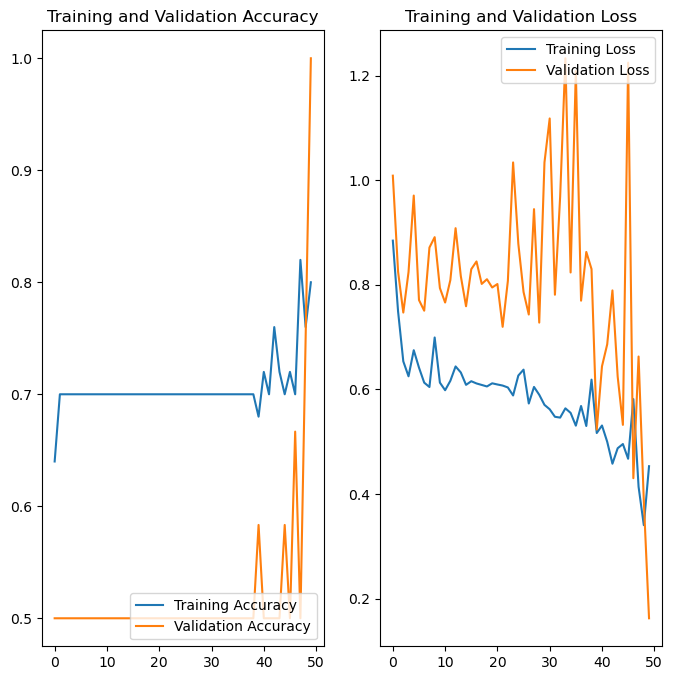

In [97]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### prediction on a sample image

first image to predict
actual label: glasses
1/1 [==============================] - 0s 21ms/step
predicted label: glasses


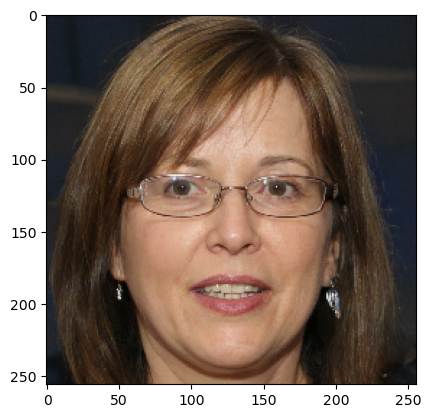

In [98]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Function for getting confidence level

In [99]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

### Testing and plotting the image with actual and expected

1/1 [==============================] - 0s 14ms/step


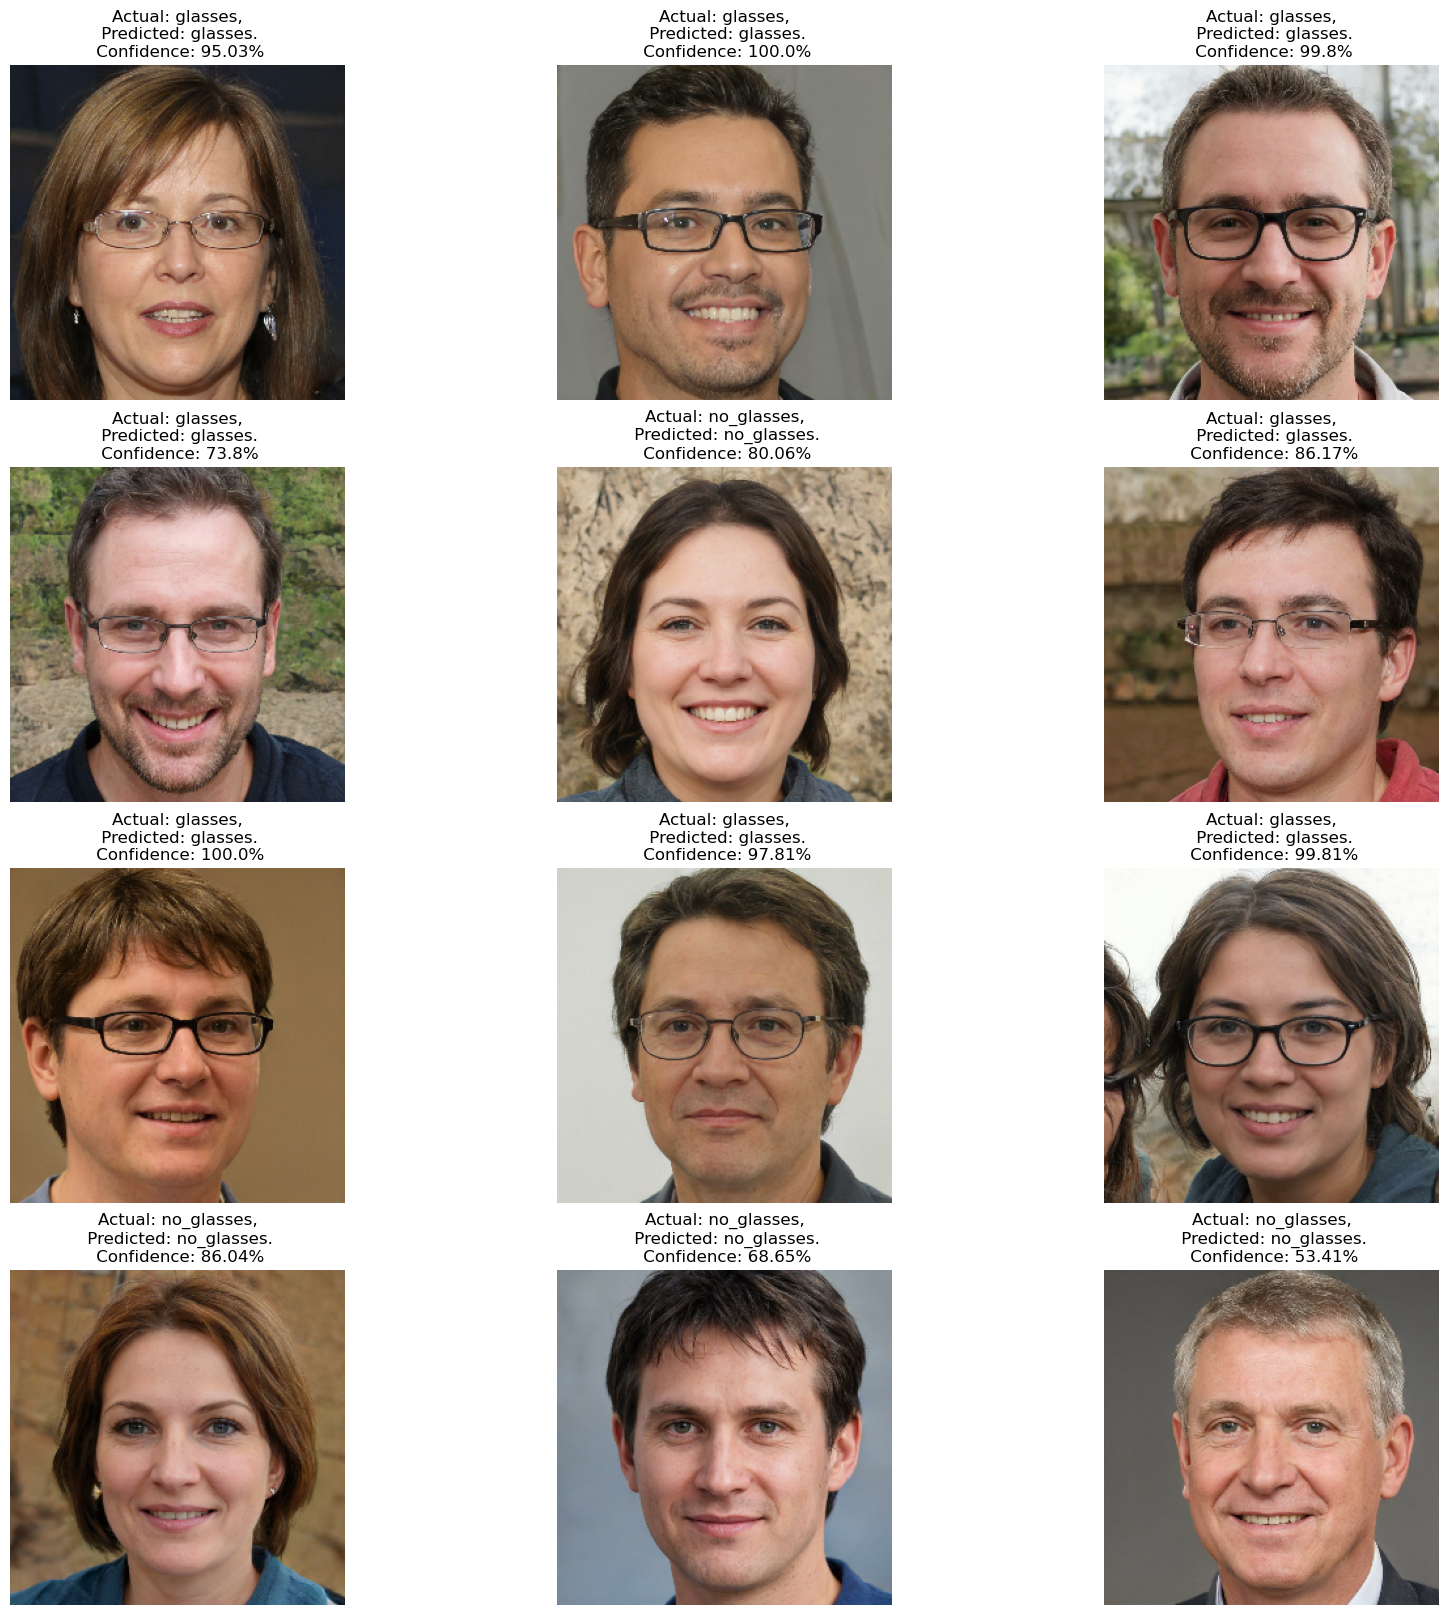

In [109]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(2):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

### Conclusion

### The model demonstrates robust performance with an accuracy of 100%. it was able to predict the image with glass and no_glass I have used data augumentation with multiple parameter to increase imgae numbers